# Deep Neural Network (DNN) 基本原理

「神經網路」的原理並不如想像中那麼高不可攀。前兩週在 YouTube 上瞄到 IBM 的影片["Introduction to Neural Networks and DeepLearning using stand-alone Python"](https://www.youtube.com/watch?v=oJoPbwmVBlk) 好奇於光用 python 就能做出「神經網路」真的嗎？那好哇！因為有 demo 程式就一定能動手去 trace 也就是一定能多少懂一點，於是就點了進去看，結果。。。
### 老天！印度人講數學原理 . . . 
幸好我聽懂了前半段，接著還是真的有短短的 python demo 程式把他講的數學公式實現出來，最後一執行────誤差真的有收斂，我終於歡欣地確認原本想像中嚇死人的大學問，其實障礙很低。這下子我深深地著了迷，不可自已地又翻了好多 YouTube 前後參考把後半段也搞到半懂。以下是從這兩週還魂回來的心得報告。

您不需要安裝任何軟體，本文可以直接 online 在網頁上執行
- 線上執行本文：https://mybinder.org/v2/gh/hcchengithub/fundamentals-of-neural-networks/master?filepath=fundamentals%20of%20neural%20networks.ipynb

- Source code : https://github.com/hcchengithub/fundamentals-of-neural-networks

_WKS RD 陳厚成 hcchen5600@gmail.com 2018.5.3_


## 基礎「神經網路」就是 Decoder

開始之前，我們先來複習一下 decoder（解碼器）有助於順順地理解「神經網路」是在幹嘛。

Decoder（解碼器）是 computer science 裡很基本的東西，學過了就很難真的忘記。任何問題只要是能用 decoder 解決的，那你用 decoder 就對了，它一定是最快最可靠的解決方案。順便複習一下，例如下圖就是簡單地用一個 decoder 實現的二進制加法器。Decoding 根本就是「查表」，從下圖左邊輸入的 a 與 b 兩個 binary bits 被 Adder 拿進去查「真值表」，根據表中的設計，立即查出什麼樣的 a,b 組合該輸出什麼樣的結果：sum 與 carry (進位)。簡單、粗暴、無腦而完美地產生正確的結果。即使到今天，CPU 內部的加法器應該還是 decoder 沒變吧？

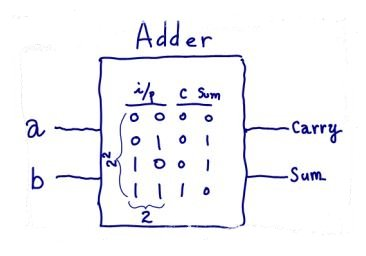

In [22]:
from IPython.display import display, Image;display(Image('adder.jpg', width=300))

現在問題改成要辨認一張大小為 300X300 由黑點、白點構成的圖片，看圖片上是「貓」還是「狗」？我們可以直接採用與 Adder 十分類似的 decoder 來處理，如下圖：

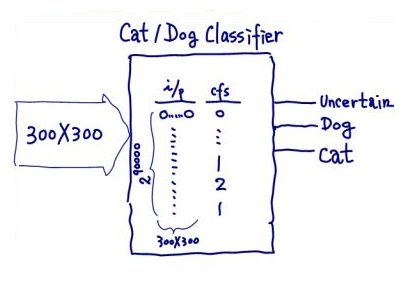

In [23]:
display(Image('cat-dog-classifier.jpg', width=350))

這回這個 decoder 功能上的名稱由 Adder 塗改成 Cat/Dog Classifier（分類器,做貓狗照片分類）; 輸入端由 a,b 兩個 bits 塗改成 300X300 表示圖片上的每一 pixcel 點，總共 9 萬條輸入線，圖中用左側輸入端一個大箭頭示意；而最後的輸出則塗改成三種可能結果各別的概率。整體還是個 decoder，實際作法還是「查表」，把 9 萬條輸入線當成「地址」到 Cat/Dog Classifier 裡查出對應的位置裡預設好的三個概率值。如此，照樣無腦而正確地分辨任何一張 300X300 照片。

可是，這 Cat/Dog Classifier 肚子裡的這張表────恐怕整個宇宙都裝不下，這就是問題所在！何故？對照 Intel 的 386 CPU 有 32 條地址線，所以它的記憶體最多是 $2^{32}$ 即 4 GBytes, 此後每增加 10 條地址線，容量就擴大 1024 倍，呈等比級數增長。 眼前這個 docoder 要求的是一個 $2^{90000}$ 容量的表格，我不知道需要幾個宇宙才夠。

## 神之 Decoder 不可得，「神經網路」是個簡化方案

下圖是個「神經網路」的範例。最左邊的輸入 vector (也就是 array) 是 $X$。$X$ 經過連接網路 $W^{(1)}$ 加權之後，充分完全地連接到下一層「中間層」(也就是 hidden layer)。這裡豎著排列的三個圓圈代表三顆 neuron（神經元）────不要被它們的名稱嚇到了，其實一顆 neuron 就是把輸入全部加起來 (示意為圖中橘色的 ＋ 號) 得 $z_i^{(2)}$，下圖中 $z^{(2)}$ 標示在 neuron 偏左一點之處，表示它是所有輸入之「和」。因為前面那麼多東西加起來的數值會很發散，所以離開 neuron 輸出前要用一個 function 把前面的「和」mapping 到與前後層的 input / output 一致的範圍裡。例如，如果是 0～1 那麼大家都是 0～1。這個 mapping function 有很多選擇，統稱為 Activation Function，圖中標示為 $f_1$。$a^{(2)}$ 位在 neuron 偏右一點之處，表示它是 Hidden layer 一整層經過 Activation Functions 之後的輸出。

最右邊（輸出層）豎著排列的三顆 neuron（神經元）的結構與 hidden layer 幾乎一樣，但是這一層的 Activation Function 可以另選，所以標示為 $f_2$ 與前一層的 $f_1$ 區別。最右邊的輸出結果標示為 $\hat{y}$ 因為一般習慣訓練用的標準答案是 $y$ 此處 $\hat{y}$ 表示它是我們的神經網路猜測出來的結果。

這裡示範的「神經元」就只是「加法」跟 Activation Function 一前一後而已，用傳統電腦程式就可以模擬出來。這也正是我們以下數學原理說明過後緊接著要做的實驗。只要 $W^{(1)}$, $W^{(2)}$ 總共 2X9=18 條 weighting 填入設計良好的值，這個「神經網路」就可以做很多有用的事情了，雖然我們現在知道那只是在做 Decoder 的工作而已，神奇色彩大減，有沒有？ 這個「神經網路」唯二的兩個「變數」就是 $W^{(1)}$, $W^{(2)}$ 兩個 Matrix (矩陣). 神奇的地方是，這兩個 Matrix 變數的值，可以讓電腦自動化地產生，這是「神經網路」神奇的地方。


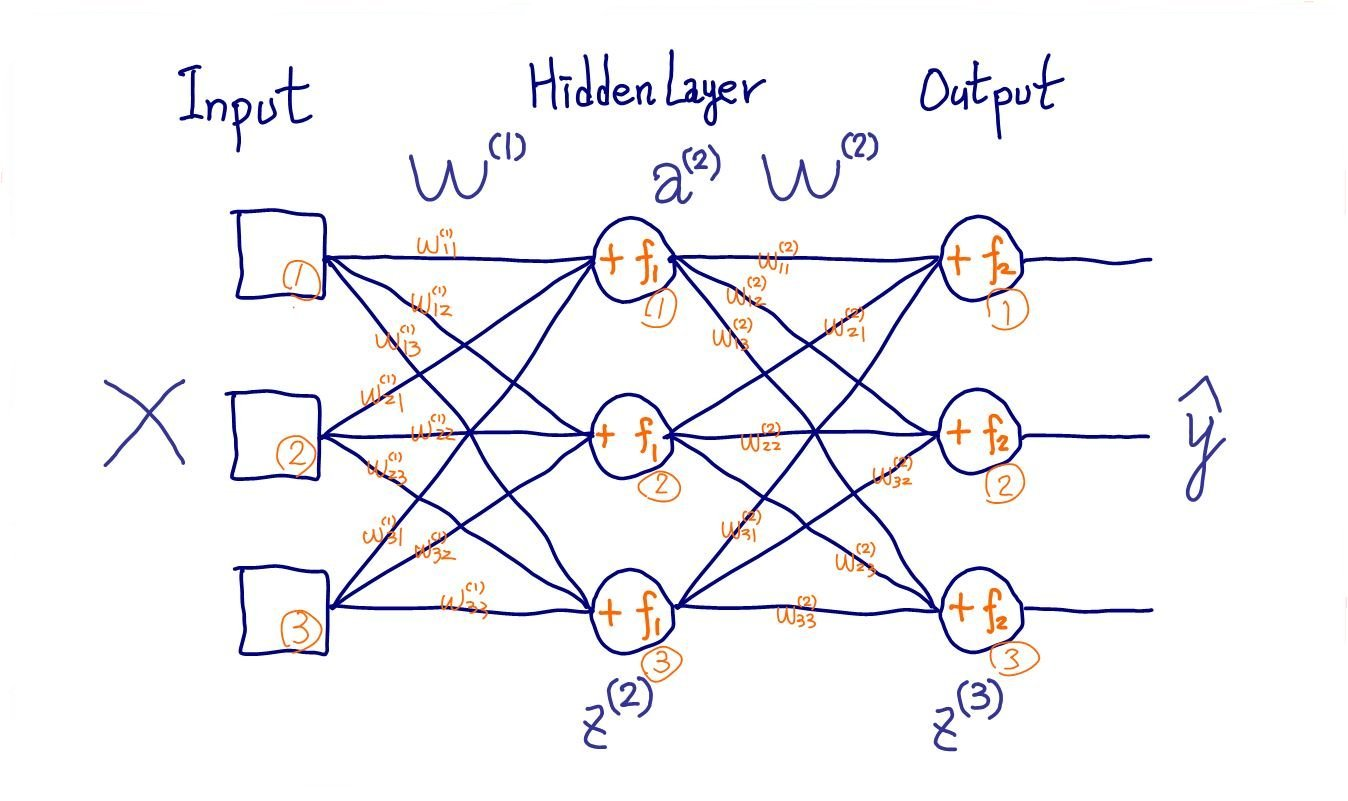

In [24]:
display(Image('nn-scatch.jpg', width=600))

## Forward Propagation

好消息先說，輸入資料 $X$ 經過 $W^{(1)}$ 加權在 $z^{(2)}$ 都加起來，這一串動作正好就是以前學過的向量 Dot Product （點積 或 內積）

$z^{(2)} = X \centerdot W^{(1)} \tag{1}$

請看 [n 維向量 Dot Product 的定義](https://baike.baidu.com/item/%E7%82%B9%E7%A7%AF/9648528?fromtitle=%E5%86%85%E7%A7%AF&fromid=422863) (Google 被擋) 如下：

$ 
A \centerdot B = 
\sum_{i=1}^n a_i b_i =
a_1 b_1  + a_2 b_2 + ... + a_n b_n \tag{2}
$

是不是正好？美妙吧！

如前述，這個 $z^{(2)}$ 的值會很發散，我們要用 Activation Function 把它 mapping 到一個整個網路一致的範圍裡，而得到 $a^{(2)}$ :

$
a^{(2)} = f_1(z^{(2)}) \tag{3}
$

$a^{(2)}$ 的地位就跟前一層的 $X$ 一樣，前一層的輸出成了下一層的輸入，所以下面兩條式子幾乎就是照抄前面的： 

$
z^{(3)} = a^{(2)} \centerdot W^{(2)} \tag{4}
$

$
\hat{y} = f_2(z^{(3)}) \tag{5}
$

得到了 $\hat{y}$ ，至於它準不準呢？全看 $W^{(1)}$, $W^{(2)}$ 調的好不好。一開始 $W$ 都用亂數瞎猜，然後讓電腦自己一步步逼近正解。


## 數學式寫成 python code

到這裡，我們趕快把上面的五條方程式用 python 改寫成電腦程式────看，竟然這麼直白！免得你還以為這些方程式僅示示意而已。

In [8]:
import numpy as np
def forward(X, W1, W2):
    z2 = np.dot(X, W1)
    a2 = f1(z2)
    z3 = np.dot(a2, W2)
    yHat = f2(z3)
    return yHat

其中 f1(), f2() 兩個 Activation Function 是從 [一大堆選擇](https://en.wikipedia.org/wiki/Activation_function) 裡任選的，我們都將採用 Sigmoid function. Sigmoid 是個把「負無限大」到「正無限大」整個 mapping 到 0～1 之間的 function. 知道意思會用就對了 [Sigmoid function 的定義、它的導函數](http://mathworld.wolfram.com/SigmoidFunction.html)（下面會用到），寫成 python 如下： 

In [26]:
def sigmoid(x):  # Sigmoid function 就這樣而已  
    return 1/(1+np.exp(-x)) 

def sigmoidPrime(x):  # Sigmoid function 的導函數，上網查就有了，自己推導也很簡單。
    return sigmoid(x) * (1-sigmoid(x))

兩者的圖形如下： 

Populating the interactive namespace from numpy and matplotlib


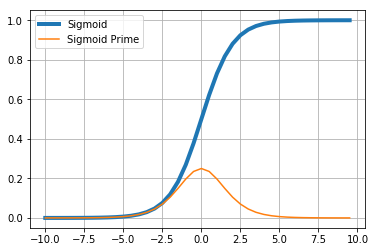

In [42]:
%pylab inline
t = np.arange(-10., 10., 0.5);
plot(t, sigmoid(t), linewidth=4);
plot(t, sigmoidPrime(t));
legend(["Sigmoid", "Sigmoid Prime"]);
grid(1);

有了 sigmoid() 之後，用來改寫上面的 forward() 如下。這可不是示意而已，這是真正能跑的程式。只要給它妥善安排好的 W1, W2 兩個矩陣，從 X 把照片餵進去，它就真的能傳回這個神經網路預測的結果，「貓」、「狗」、「其他」，三者的概率。

In [1]:
def forward(X, W1, W2):
    z2 = np.dot(X, W1)
    a2 = sigmoid(z2)  # f1 採用 sigmoid
    z3 = np.dot(a2, W2)
    yHat = sigmoid(z3)  # f2 也採用 sigmoid
    return yHat

# Cost Function

讓電腦自動調整 $W^{(1)}$, $W^{(2)}$ 的基本構想跟我們在牆上掛一幅畫的邏輯是一樣的。先扶著隨便貼在牆上，然後你需要有人站遠處幫忙看，「整個往右邊挪一挪，高點、高點，左邊下降，再降。。。」這個在遠處幫忙看的人可比「神經網路」的 Cost Function, 也就是呈現誤差的辦法。這個辦法也是可以隨人安排的，令 $J$ 為 Cost Function 那麼最原始的辦法就是土土地直接說 $J$ 是 $y$ 與 $\hat{y}$ 的差距：

$
J = y - \hat{y} \tag{6}
$

然而，就像這位站遠處幫忙看的人一樣，他的視力是遠視、近視、青光眼、白內障，都無所謂，只要能一次一次地提供有效的意見以供逐步調整就行了。這個 Cost Function 只要與 $(y - \hat{y})$ 有個某種關係就行了，我們可以揉捏它，把弄成更有利的形式。例如：

$
J = \frac{1}{2}(y - \hat{y})^2 \tag{7}
$

就是很常見的一種 Cost Function. 取平方可以在誤差越大的時候讓 $J$ 劇烈地反映，反之當誤差越來越小時 $J$ 也變得精細，類似你停車入庫時也是這麼踩油門的。二次方程式，拋物線，就是有這樣的優點，所以比（6）式優秀。前置塞個 $\frac{1}{2}$ 上去不會影響 $J$ 的效用，等會兒就會明白它的好處。


當「神經網路」的輸出是個 Vector (或 Array) 的時候，例如我們舉的例子是「貓」「狗」「其他」三個概率值，$J$ 怎麼辦呢？沒關係，還是那句老話，怎麼做都行只要維持與 $(y - \hat{y})$ 有個某種關係就行了，最簡單就是把它們全都加起來：

$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{8}
$

或者不加處理，誤差 $J$ 就是個 Vector 無妨。下面請瞧瞧 （7）式 $J$ 的圖形，用來畫出圖形所引入的 delta 就是 $(y - \hat{y})$。

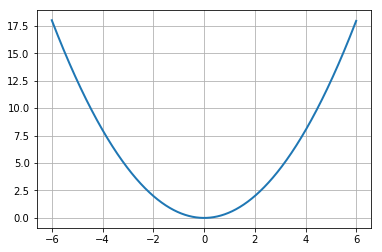

In [39]:
delta = arange(-6,6,0.01)   # delta 就是 (y - yHat)
plot(delta, 0.5*delta**2, linewidth= 2); grid(1);

# Gradient Decent

上圖，中央極小值處就是調整 $W^{(1)}$, $W^{(2)}$ 使得 $\hat{y}$ 逼近到 $y$ 之目標。換個方式來說明：拋物線上的每一「點」，就是某一套 $W$ 所對應的誤差。如此一來，任何一套 $W$ 都有個拋物線上的「瞬時斜率」，它就是在告訴我們若要減少誤差則 $W^{(1)}$, $W^{(2)}$ 該往那個方向調整、以及調整幅度。

從（6）式任意改寫成（7）式就憑空生出這樣的效果，感覺有點神（ㄎㄜˇ）奇（ㄧˊ），然而它真的有效。這就是著名的 Gradient Decent （梯度下降法）的源頭了。

# The Goal of Backpropagation 

為了推導出自動調整 $W^{(1)}$, $W^{(2)}$ 的方法，請先看看這兩個東西：$\frac {\partial J}{\partial W^{(1)}}$, $\frac{\partial J} {\partial W^{(2)}}$ 分別代表誤差 $J$ 在上一把亂猜的 $W^{(1)}$, $W^{(2)}$ 作用之下的「瞬時斜率」。如果能求得這兩個東西，那麼上一趟胡亂猜測所得到的「誤差 $J$」就可以為我們指出下一趟的 $W^{(1)}$, $W^{(2)}$ 該怎麼調整：

 $
 W^{(1)}_t = W^{(1)}_{t-1} - k \frac {\partial J_{t-1}}{\partial W_{t-1}^{(1)}} \tag{9}
 $
 
 $
 W^{(2)}_t = W^{(2)}_{t-1} - k \frac {\partial J_{t-1}}{\partial W_{t-1}^{(2)}} \tag{10}
 $ 

$t$ 是訓練過程中接下來將要跑的這趟，$t$ - 1 則是上一趟。其中的 $k$ 是個任意指定的（0~1）之間的 Learning Rate (我翻作：步幅)。例如你路邊停車時，收費員幫忙引導：「來來來，還差一公尺，來」，你仍然輕輕地採油門，有多輕？$k$ 這麼輕，以避免衝過頭，重複來回。$k$ 乘上「瞬時斜率」就得到 $W$ 該修正的幅度了。

真實的程式碼如下：

In [ ]:
# 想像中，自動調整 W1,W2 的程式不曉得高深到幾重天，哪知就醬！！
W1 = W1 - learningRate * dJdW1
W2 = W2 - learningRate * dJdW2

從第（7）式

$
J = \frac{1}{2}(y - \hat{y})^2 \tag{7}
$

分別對 $W^{(1)}$, $W^{(2)}$ 做 Partial Derivative (偏微分) 導出程式要用到的 dJdW1 與 dJdW2. 從尾巴倒推，先對付 dJdW2 過程如下:

$
\frac{\partial J}{\partial W^{(2)}} = 
$

$
\frac{\partial}{\partial W^{(2)}} 
\frac{1}{2}(y - \hat{y})^2 =
$

$
(y - \hat{y}) 
\frac{\partial}{\partial W^{(2)}} (y - \hat{y}) =
$

$
(y - \hat{y}) 
(0 - \frac{\partial \hat{y}}{\partial W^{(2)}})
$

$
\frac{\partial J}{\partial W^{(2)}} = -(y - \hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}} \tag{11}
$

由以上式（5）：

$
\hat{y} = f_2(z^{(3)}) \tag{5}
$

因此 $\frac{\partial \hat{y}}{\partial z^{(3)}}$ 就是 $f_2^{'}(z^{(3)})$ 也就是 Sigmoid function 的導函數 SigmoidPrime 代進 $z^{(3)}$ 就是了，而 $z^{(3)}$ 在前面 python code 裡已知。

這下子，式（11）之中最後的 $\frac{\partial \hat{y}}{\partial W^{(2)}}$ 改寫成 $\frac{\partial \hat{y}}{\partial z^{(3)}} \frac{\partial z^{(3)}}{\partial W^{(2)}}$ 之後就可以得到：  

$f_2^{'}(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}} \tag{12} $

又由式（4）所指出 $z^{(3)}$, $a^{(2)}$, and $W^{(2)}$ 的三角關係：

$
z^{(3)} = a^{(2)} \centerdot W^{(2)} \tag{4}
$

得知 $\frac{\partial z^{(3)}}{\partial W^{(2)}}$ 就是 $a^{(2)}$ 但是這個 $a^{(2)}$ 放回式（12）前需要操作一下，以下會說明。

另外，我們可以把式（11）的 $-(y - \hat{y})$ 銜接到式（12）的 $f_2^{'}(z^{(3)})$ 看成「誤差函數」而表示為： $\delta^{(3)}$

$
\delta^{(3)} = -(y - \hat{y}) \times f_2^{'}(z^{(3)}) \tag{13}
$

藉此繼續完成式（11）得：

$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^{T}
(-(y - \hat{y}) \times f_2^{'}(z^{(3)})) = (a^{(2)})^{T} \centerdot \delta^{(3)} \tag{14}
$

這裡比較奇怪的是式（4）裡的 $z^{(3)}$ 是由 Dot Product (內積) 得來的，這種 Vector 運算也能延用在 Partial Derivative (偏微分)上嗎？我覺得很陌生，想必是有條件的，至少矩陣的轉置、前後位置該怎麼放，等等，比 Scalar（純量）多出好多性質。我們從 YouTube 上學來的，老師一給就是答案了，這個 $a^{(2)}$ 可以用來置換式（12）中的 $\frac{\partial z^{(3)}}{\partial W^{(2)}}$，但是要做個 Transposing (矩陣轉置) 而成為 $(a^{(2)})^{T}$ 之後移到前面去。我就只知道要這樣操作，而且檢查前後矩陣的 shape（長、寬）是對的。

$\frac{\partial J}{\partial W^{(2)}}$ 分析完畢，寫成 python code 直直白白地就是：

In [ ]:
yHat = forward(X)
delta3 = np.multiply(-(y-yHat), sigmoidPrime(z3))
dJdW2 = np.dot(a2.T, delta3)

# 簡單到令人起疑？ 請自對照以上方程式，是這樣沒錯。


回頭，再從第（7）式對 $W^{(1)}$ 做 Partial Derivative (偏微分) 導出程式要用到的 dJdW1：

$
J = \frac{1}{2}(y - \hat{y})^2 \tag{7}
$

這次可以照抄式（11），跳過一些中間過程，只是把 $W^{(2)}$ 改成 $W^{(1)}$ 即得

$
\frac{\partial J}{\partial W^{(1)}} = 
-(y - \hat{y}) \frac{\partial \hat{y}}{\partial W^{(1)}}
\tag{15}
$

式（15）的尾巴單獨拿出來分析： 

$
\frac{\partial \hat{y}}{\partial W^{(1)}} = \frac{\partial}{\partial W^{(1)}} f_2(z^{(3)}) =
f_2^{'}(z^{(3)})\frac{\partial z^{(3)}}{\partial W^{(1)}} \tag{16}
$

參考式（4）抄錄如下：

$
z^{(3)} = a^{(2)} \centerdot W^{(2)} \tag{4}
$

用來置換式（16）的尾巴，這裡又發生 Dot Product (點積) 項的操作，被「偏微分」甩出來的 $W^{(2)}$ 要「轉置」後調動到前面去：

$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial}{\partial W^{(1)}} a^{(2)} \centerdot W^{(2)} =
(W^{(2)})^T \centerdot \frac{\partial a^{(2)}}{\partial W^{(1)}}  \tag{17}
$

其中的 $\frac{\partial a^{(2)}}{\partial W^{(1)}}$ 可以改寫成：

$
\frac{\partial a^{(2)}}{\partial W^{(1)}} = 
\frac{\partial a^{(2)}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial W^{(1)}} \tag{18}
$

參考式（3）抄錄如下：

$
a^{(2)} = f_1(z^{(2)}) \tag{3}
$

式（18）的右邊就等於是：

$
f_1^{'}(z^{(2)}) \frac{\partial z^{(2)}}{\partial W^{(1)}}  \tag{19}
$

由式（1） 所定義的 $z^{(2)}$，$X$，$W^{(1)}$ 三角關係：

$
z^{(2)} = X \centerdot W^{(1)} \tag{1}
$

看出式（19）中的 $\frac{\partial z^{(2)}}{\partial W^{(1)}}$ 就是 $X$，但是討論如前，放回式子前要記得轉置後移到最前面去。到這裡，已經通通都水落石出了。大整合前，我們先令 

$
\delta^{(2)} = \delta^{(3)} 
\centerdot
(W^{(2)})^{T}
\times
f_1^\prime(z^{(2)})  \tag{20}
$

整合以上各個局部

$
\frac{\partial J}{\partial W^{(1)}} = 
-(y - \hat{y}) \frac{\partial \hat{y}}{\partial W^{(1)}} =
$

$
-(y - \hat{y}) \times f_2^{'}(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}} =
$

$
\delta^{(3)} \centerdot (W^{(2)})^T \times \frac{\partial a^{(2)}}{\partial W^{(1)}}  =
$

$
\delta^{(3)} \centerdot (W^{(2)})^T \times f_1^{'}(z^{(2)}) \frac{\partial z^{(2)}}{\partial W^{(1)}} =
$

$
X^{T} \centerdot \delta^{(3)} \centerdot (W^{(2)})^T \times f_1^{'}(z^{(2)})
$

用式（20）的 $\delta^{(2)}$ 置入上式得：

$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T} \centerdot \delta^{(2)} \tag{21}
$

直接寫成 python code 則為：

In [ ]:
delta2 = np.dot(delta3, W2.T) * sigmoidPrime(z2)
dJdW1 = np.dot(X.T, delta2)

# 請自對照以上方程式，看是不是這樣沒錯？


就醬子 dJdW1 跟 dJdW2 都進了 python code 就這麼幾行而已，神奇的「神經網路」自動調整網路參數 $W$ 的目標就已經實現了！不管 hidden layer 有幾層，前後銜接擴充層數的數學模型還是這樣。最後，挑出重點的幾條方程式，請欣賞如下：

### Forward

$$
z^{(2)} = X \centerdot W^{(1)} \tag{i}\\
$$

$$
a^{(2)} = f(z^{(2)}) \tag{ii}\\
$$

$$
z^{(3)} = a^{(2)} \centerdot W^{(2)} \tag{iii}\\
$$

$$
\hat{y} = f(z^{(3)}) \tag{iv}\\
$$

### Cost Function

$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{v}
$$

### Backpropagation

$$
\delta^{(3)} = -(y-\hat{y}) 
\times 
f^\prime(z^{(3)})   \tag{vi}
$$

$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T
\centerdot
\delta^{(3)} \tag{vii}
$$

$$
\delta^{(2)} = \delta^{(3)} 
\centerdot
(W^{(2)})^{T}
\times
f^\prime(z^{(2)})  \tag{viii}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\centerdot
\delta^{(2)} \tag{ix}
$$



看著這套式子，心裡油然而生一股彷彿當年看著 Maxwell's Equations (電磁學) 的感覺，恍如隔世。恭錄老師 [Romeo Kienzler](https://www.youtube.com/channel/UC_zIqSWu-yQcBAywLtHDAfg) 所舉的實例，如下。

In [ ]:
import numpy as np

class Neural_Network(object):
    def __init__(self):
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5 * sum((y - self.yHat)**2)
        return J
    
    # Derivative of Sigmoid 求其導函數
    # See http://www.mathcaptain.com/trigonometry/sigmoid-function.html
    def sigmoidPrime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        djdw2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        djdw1 = np.dot(X.T, delta2)

        return djdw1, djdw2

In [47]:
X = np.array(([3,5], [5,1], [10,2]),dtype=float)
y = np.array(([75], [82], [93]),dtype=float)

NN = Neural_Network()
max_iterations = 10000
iter = 0
learningRate = 0.1

In [48]:
while iter < max_iterations:
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

    NN.W1 = NN.W1 - learningRate * dJdW1
    NN.W2 = NN.W2 - learningRate * dJdW2

    if iter % 1000 == 0:
        print(NN.costFunction(X,y))

    iter += 1

10263.90359
10250.509872
10250.5049421
10250.503289
10250.5024585
10250.5019567
10250.5016178
10250.5013697
10250.5011736
10250.5010031


執行上面的 demo 程式，看到列出來的 costFunction() 的變化是真的在收斂就對了，證明「神經網路」的自動學習已經發生了！ 

這個 demo 很精簡，抓緊重點而已。如果想看這個「神經網路」處理實際問題，或對照其他老師的講解，可以去瞧瞧以下推薦的 YouTube 教學： 

- Neural Networks From Zero, series 1~8 https://github.com/hcchengithub/Iris-Neural-Network 處理 Iris 分類 <br>
- How to make a neural network (live) - Siraj https://www.youtube.com/watch?v=vcZub77WvFA 猜測 XOR 運算 <br>
- Neural Networks Demystified - Welch Labs https://github.com/hcchengithub/Neural-Networks-Demystified 這個讚！我的若不清楚看他的。




# --- The End ---